In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tesla-stock-price-dataset/Tesla Dataset.csv


Le dataset "Tesla Stock Price" disponible sur Kaggle contient les données historiques des prix des actions de Tesla. Nous allons créer une histoire basée sur l'analyse de ces données à travers diverses visualisations et statistiques.

**Étape 1: Chargement et Préparation des Données**

Tout d'abord, nous chargeons les données et effectuons quelques préparations initiales.

In [2]:
import pandas as pd

# Charger les données
df = pd.read_csv('/kaggle/input/tesla-stock-price-dataset/Tesla Dataset.csv')

# Afficher les premières lignes du dataset
print(df.head())


         Date      Open      High       Low     Close  Adj Close     Volume
0  2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1  2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2  2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3  2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4  2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


**Étape 2: Exploration des Données**

Nous commençons par explorer les données pour comprendre leur structure et obtenir quelques statistiques descriptives de base.

In [3]:
# Afficher des statistiques descriptives
print(df.describe())

# Afficher les informations sur les colonnes
print(df.info())


              Open         High          Low        Close    Adj Close  \
count  3509.000000  3509.000000  3509.000000  3509.000000  3509.000000   
mean     74.057486    75.666813    72.324719    74.032508    74.032508   
std     101.999514   104.244555    99.528061   101.915952   101.915952   
min       1.076000     1.108667     0.998667     1.053333     1.053333   
25%      11.346000    11.580000    11.037333    11.328667    11.328667   
50%      17.334000    17.563999    16.974667    17.330667    17.330667   
75%     147.783340   150.940002   143.566666   147.383331   147.383331   
max     411.470001   414.496674   405.666656   409.970001   409.970001   

             Volume  
count  3.509000e+03  
mean   9.683246e+07  
std    7.894845e+07  
min    1.777500e+06  
25%    4.716300e+07  
50%    8.203590e+07  
75%    1.226560e+08  
max    9.140820e+08  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3509 entries, 0 to 3508
Data columns (total 7 columns):
 #   Column     Non-Null Coun

**Étape 3: Visualisation de l'Évolution des Prix**

Nous allons tracer l'évolution des prix de clôture des actions de Tesla pour voir comment le prix a changé au fil du temps.

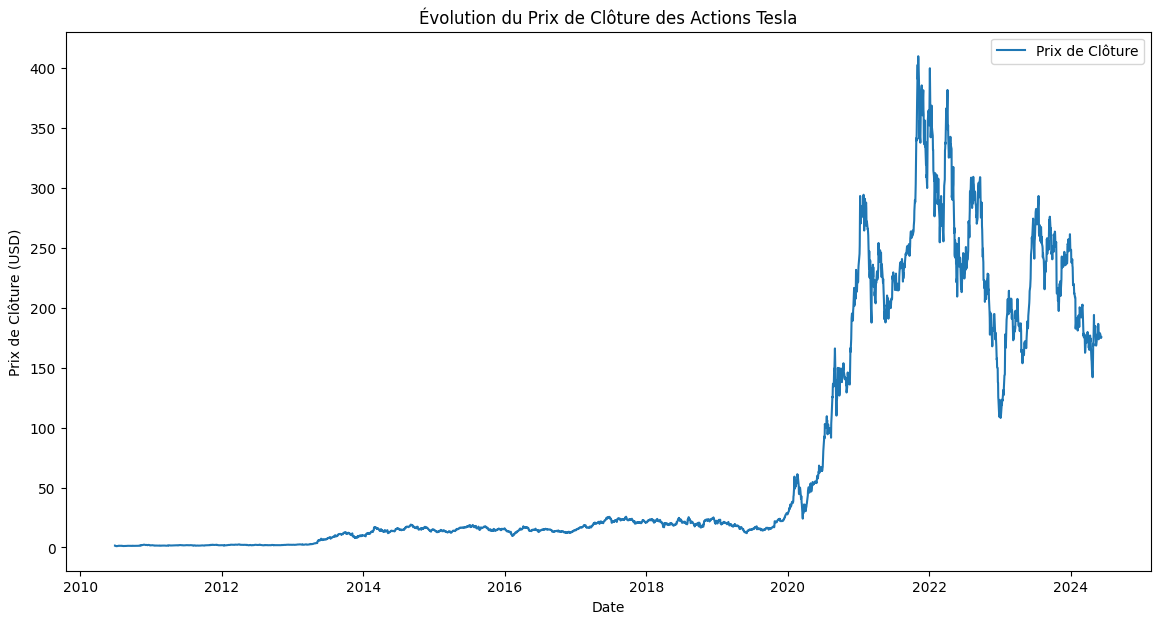

In [4]:
import matplotlib.pyplot as plt

# Convertir la colonne Date en format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Tracer les prix de clôture
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Prix de Clôture')
plt.title('Évolution du Prix de Clôture des Actions Tesla')
plt.xlabel('Date')
plt.ylabel('Prix de Clôture (USD)')
plt.legend()
plt.show()

**Étape 4: Calcul des Retours Quotidiens**

Nous calculons les retours quotidiens pour analyser la volatilité des actions de Tesla.

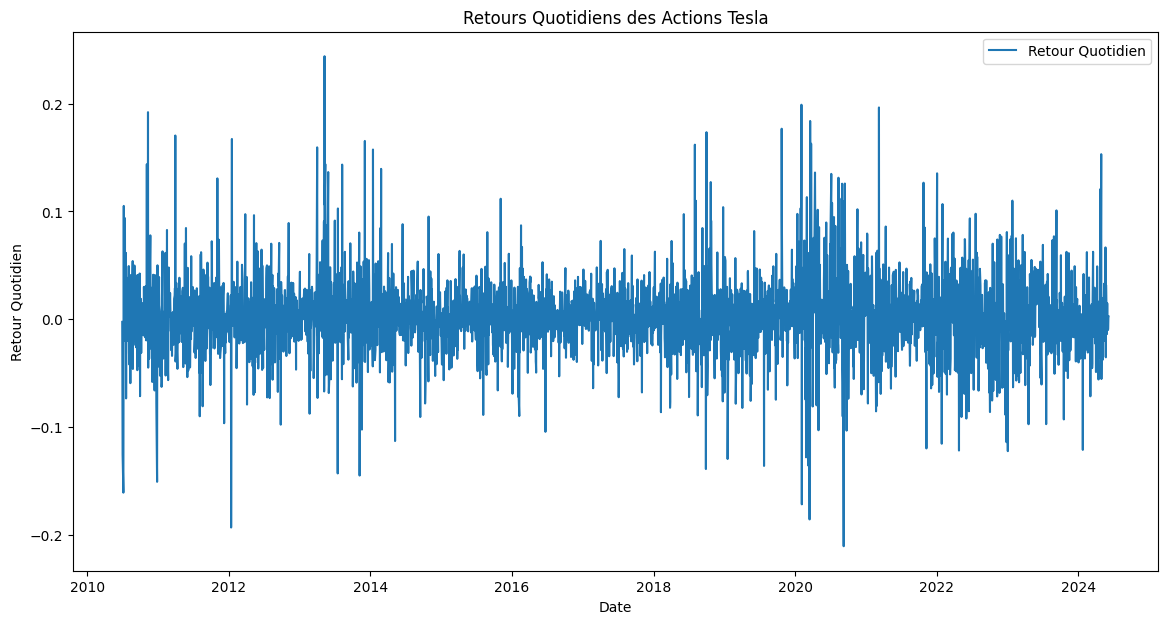

In [5]:
# Calcul des retours quotidiens
df['Daily Return'] = df['Close'].pct_change()

# Tracer les retours quotidiens
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Daily Return'], label='Retour Quotidien')
plt.title('Retours Quotidiens des Actions Tesla')
plt.xlabel('Date')
plt.ylabel('Retour Quotidien')
plt.legend()
plt.show()

**Étape 5: Distribution des Retours Quotidiens**

Nous utilisons un histogramme pour visualiser la distribution des retours quotidiens.

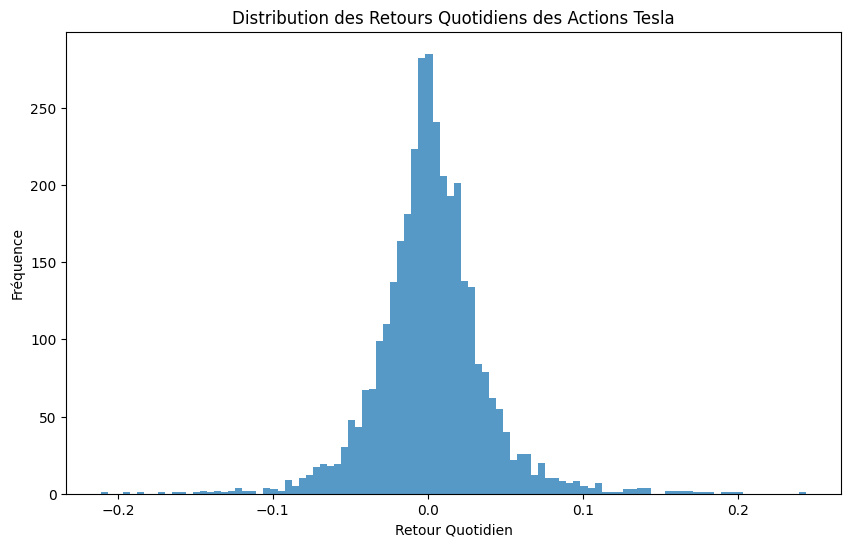

In [6]:
# Tracer l'histogramme des retours quotidiens
plt.figure(figsize=(10, 6))
plt.hist(df['Daily Return'].dropna(), bins=100, alpha=0.75)
plt.title('Distribution des Retours Quotidiens des Actions Tesla')
plt.xlabel('Retour Quotidien')
plt.ylabel('Fréquence')
plt.show()

**Étape 6: Moyenne Mobile**

Nous calculons et traçons la moyenne mobile pour lisser les variations quotidiennes et identifier les tendances à long terme.

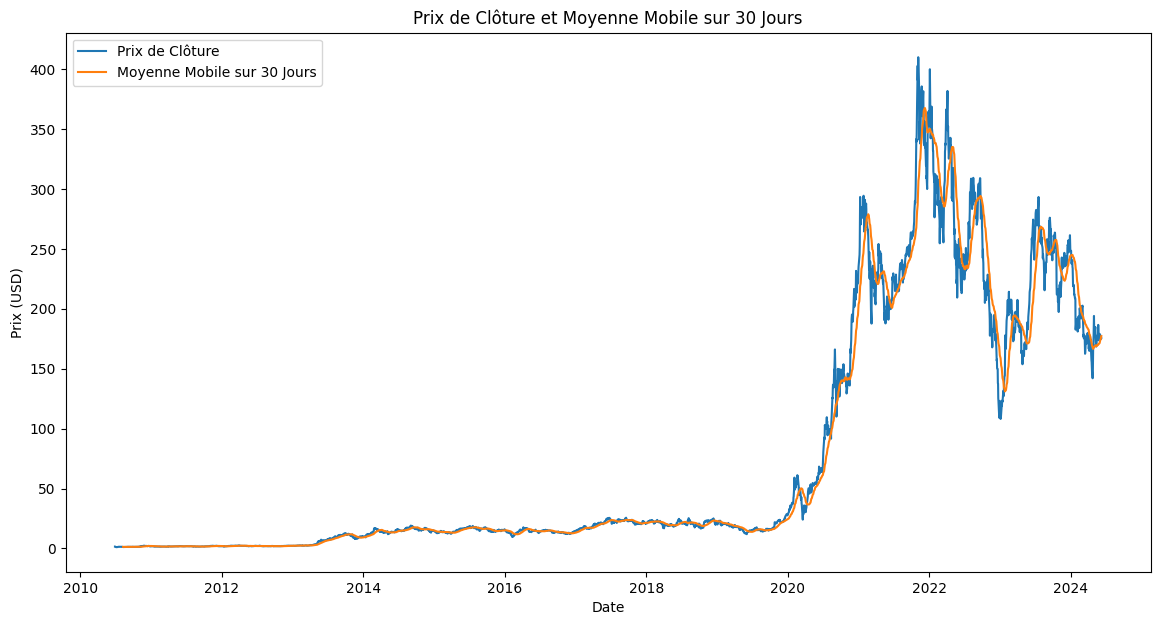

In [7]:
# Calcul de la moyenne mobile sur 30 jours
df['30 Day Moving Average'] = df['Close'].rolling(window=30).mean()

# Tracer la moyenne mobile
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Prix de Clôture')
plt.plot(df['Date'], df['30 Day Moving Average'], label='Moyenne Mobile sur 30 Jours')
plt.title('Prix de Clôture et Moyenne Mobile sur 30 Jours')
plt.xlabel('Date')
plt.ylabel('Prix (USD)')
plt.legend()
plt.show()

**Étape 7: Analyse des Volumes**

Nous analysons le volume des transactions pour voir s'il y a des corrélations avec les variations de prix.

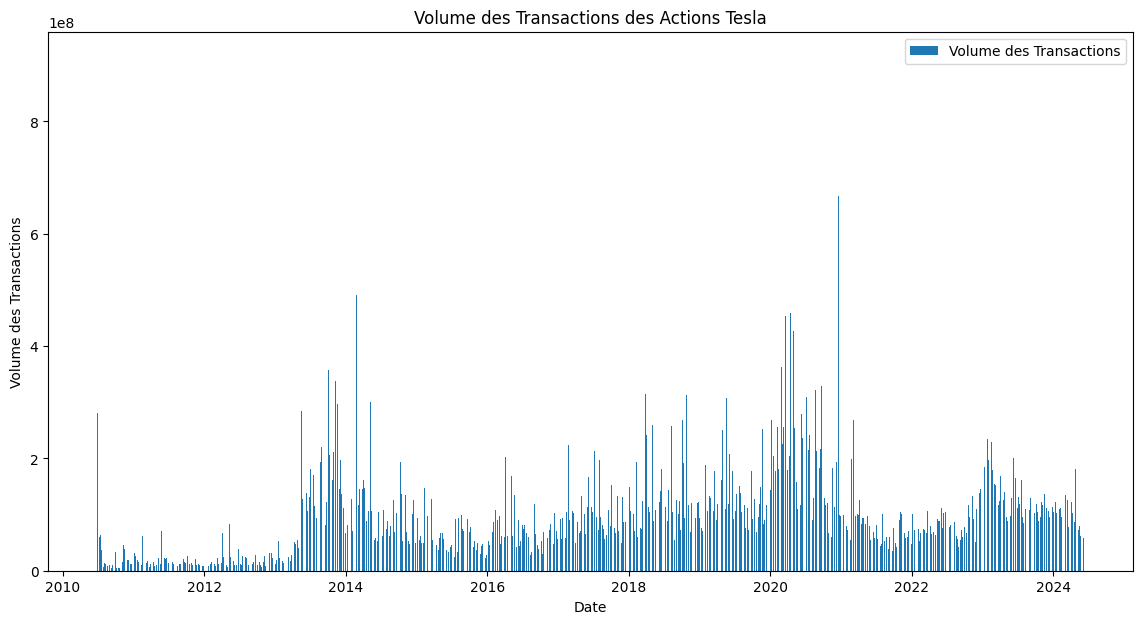

In [8]:
# Tracer le volume des transactions
plt.figure(figsize=(14, 7))
plt.bar(df['Date'], df['Volume'], label='Volume des Transactions')
plt.title('Volume des Transactions des Actions Tesla')
plt.xlabel('Date')
plt.ylabel('Volume des Transactions')
plt.legend()
plt.show()

**Étape 8: Corrélation entre les Variables**

Nous calculons la matrice de corrélation pour voir les relations entre différentes variables comme le prix d'ouverture, de clôture, le haut, le bas et le volume.

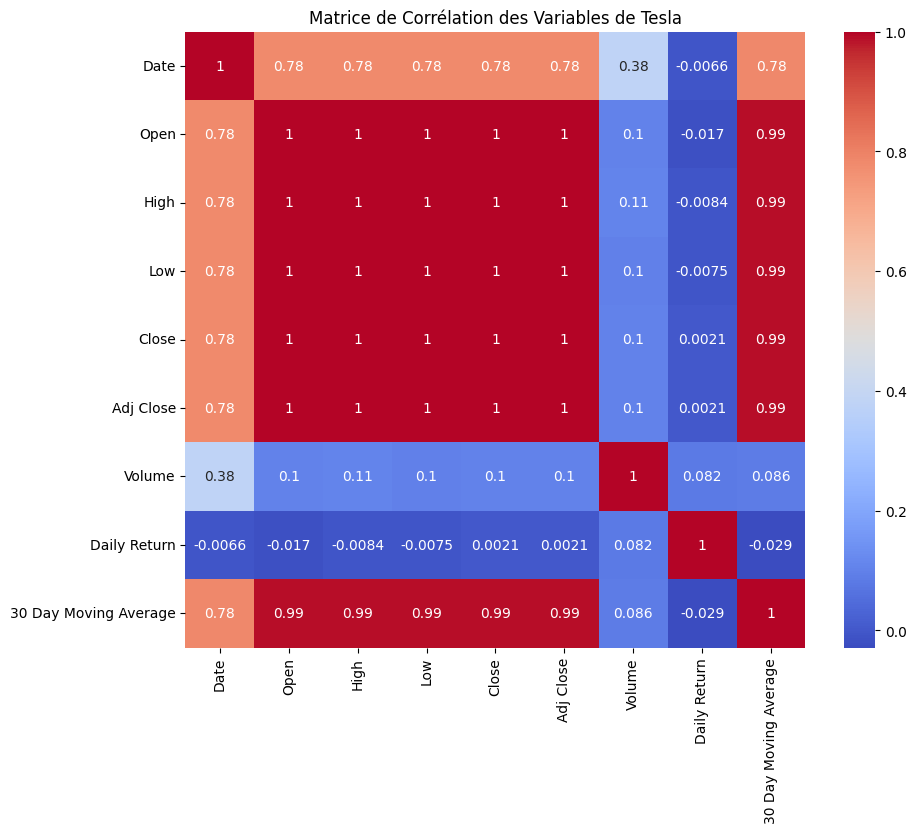

In [9]:
import seaborn as sns

# Calcul de la matrice de corrélation
corr_matrix = df.corr()

# Tracer la carte de chaleur de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation des Variables de Tesla')
plt.show()

**Conclusion**

En conclusion, cette analyse des données de Tesla nous a permis de :

    Visualiser l'évolution des prix de clôture au fil du temps.
    Analyser les retours quotidiens et leur distribution.
    Calculer et tracer la moyenne mobile pour identifier les tendances.
    Étudier le volume des transactions.
    Comprendre les corrélations entre différentes variables.

Ces visualisations et analyses nous aident à mieux comprendre les tendances et la volatilité des actions de Tesla, ce qui peut être utile pour les investisseurs et les analystes financiers.